## A. Basics of inferential statistics


In [14]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [15]:
'''
BY MEAN CPS
'''

df_t = pd.read_csv('data/smartphone-typing.csv')
df_t['cps'] = df_t['n_letters'] / (df_t['trialtime'] / 1000)

df_young = df_t[df_t['age_group'] == 'young']
df_old = df_t[df_t['age_group'] == 'old']

df_id_young = df_young.groupby('id').mean()
df_id_old = df_old.groupby('id').mean()

d = {'young': 0, 'old': 1}
df_t['age_group_mapped'] = df_t['age_group'].map(d)

print ("-------------------")
print ('YOUNG')
print (df_id_young.head())
print ("-------------------")
print ('OLD')
print (df_id_old.head())

-------------------
YOUNG
      sentence  n_letters  trialtime  error_percent  backspaces       cps
id                                                                       
101  25.500000  17.820000    9350.04       0.004851    2.680000  2.084664
102  26.088889  17.755556    6890.20       0.499302    0.777778  2.895769
103  25.500000  17.820000    9656.74       0.000000    3.220000  2.037604
104  25.500000  17.820000    5687.94       0.000000    1.400000  3.428032
105  25.500000  17.820000    6811.36       0.001111    1.000000  2.779482
-------------------
OLD
      sentence  n_letters     trialtime  error_percent  backspaces       cps
id                                                                          
201  25.500000  17.820000  11610.460000       0.004968    0.260000  1.595285
202  25.306122  17.938776  12221.857143       0.006708    1.448980  1.694431
203  24.153846  17.846154  64599.461538       0.896754    5.076923  0.423317
204  25.500000  17.820000  23328.540000       0

In [3]:
'''
BY CPS
'''

df_t = pd.read_csv('data/smartphone-typing.csv')
df_t['cps'] = df_t['n_letters'] / (df_t['trialtime'] / 1000)

df_young = df_t[df_t['age_group'] == 'young']
df_old = df_t[df_t['age_group'] == 'old']

print ("-------------------")
print ('YOUNG')
print (df_young.head())
print ("-------------------")
print ('OLD')
print (df_old.head())

-------------------
YOUNG
    id age_group  sentence  n_letters  trialtime  error_percent  backspaces  \
0  101     young         1         19      13696       0.052632           9   
1  101     young         2         18      11080       0.000000           4   
2  101     young         3         15       7774       0.000000           1   
3  101     young         4         19      11943       0.000000           5   
4  101     young         5         13       5169       0.000000           0   

        cps  
0  1.387266  
1  1.624549  
2  1.929509  
3  1.590890  
4  2.514993  
-------------------
OLD
      id age_group  sentence  n_letters  trialtime  error_percent  backspaces  \
625  201       old         1         19      12020            0.0           0   
626  201       old         2         18      13297            0.0           0   
627  201       old         3         15       9156            0.0           0   
628  201       old         4         19      11356            0.0  

1. Conduct a hypothesis test with the hypothesis that mean CPS is different between the age groups using a t-test. Report the hypothesis, the null hypothesis, and the test statistics (t and p values). Specify which t-test you chose and why. What (valid) inference can you make based on the result of the statistical test? Note that you may have to run additional tests in order to answer the last question. (3p)

    - **Hypothesis + null hypothesis (1p)**
    - **Test statistics (1p)**
    - **Some valid inference, including additional tests (1p)**

In [16]:
'''
BY MEAN CPS
'''

x1=df_id_young['cps']
x2=df_id_old['cps']

u,p = stats.ttest_ind(x1, x2, equal_var=False)
print ('test statistic: {}, p-value: {}'.format(u,p))

test statistic: 8.722553664271569, p-value: 4.00175102215898e-08


In [17]:
'''
BY CPS
'''

x1=df_young['cps']
x2=df_old['cps']

u,p = stats.ttest_ind(x1, x2, equal_var=False)
print ('test statistic: {}, p-value: {}'.format(u,p))

test statistic: 27.550281982397763, p-value: 1.852876668781571e-121


In [6]:
'''
BY MEAN CPS
'''

x1=df_id_young['cps']
x2=df_id_old['cps']

u,p = stats.normaltest(x1)
print ('NORMAL TEST: {}, p-value: {}'.format(u,p))

u,p = stats.normaltest(x2)
print ('NORMAL TEST: {}, p-value: {}'.format(u,p))

u,p = stats.levene(x1, x2)
print ('LEVENE: {}, p-value: {}'.format(u,p))

NORMAL TEST: 0.9180820906358115, p-value: 0.6318893082696717
NORMAL TEST: 1.9094733639177162, p-value: 0.3849134858750034
LEVENE: 0.10941902533744279, p-value: 0.7439363258180747


/Users/ainiputkonen/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
/Users/ainiputkonen/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [7]:
'''
BY CPS
'''

x1=df_young['cps']
x2=df_old['cps']

u,p = stats.normaltest(x1)
print ('NORMAL TEST: {}, p-value: {}'.format(u,p))

u,p = stats.normaltest(x2)
print ('NORMAL TEST: {}, p-value: {}'.format(u,p))

u,p = stats.levene(x1, x2)
print ('LEVENE: {}, p-value: {}'.format(u,p))

NORMAL TEST: 870.9085880074934, p-value: 7.666603323861974e-190
NORMAL TEST: 57.92327734294525, p-value: 2.6431398232293453e-13
LEVENE: 32.52136190703034, p-value: 1.548968243533193e-08


2. Conduct the same analysis as in (1) using a rank dependent test. What (valid) inference can you make based on the result of the statistical test? (2p)

    - **Correct test statistics (1p)**
    - **Some valid inference (1p)**
        - Note that if you use the participant specific average CPS, the condition 'number of observation in each sample is > 20' is not fulfilled

In [8]:
'''
BY MEAN CPS
'''

x1=df_id_young['cps']
x2=df_id_old['cps']

u, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')
print ('test statistic: {}, p-value: {}'.format(u,p))

test statistic: 140.0, p-value: 4.711347153516151e-05


In [9]:
'''
BY CPS
'''

x1=df_young['cps']
x2=df_old['cps']

u, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')
print ('test statistic: {}, p-value: {}'.format(u,p))

test statistic: 225296.5, p-value: 1.5932413559264853e-122


## B. Play with samples

1. Generate an artificial data set A coming from a normally distributed pop- ulation with μ = 100 and σ = 20. Draw 1000 samples of size N = 100 (note the difference between sample size and number of samples). Plot a histogram of three of those 1000 samples. (1p)

    - **Sample drawn correctly (0.5p)**
    - **Plot (0.5p)**

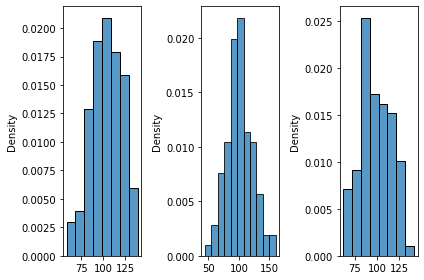

In [10]:
np.random.seed(500)

n_sample = 1000
N = 100

mu1 = 100
sigma = 20 

data1 = np.random.normal(mu1, scale=sigma, size=(n_sample, N))

n_to_view = 3

fig, axes = plt.subplots(ncols=n_to_view)
for i, x in enumerate(data1[:n_to_view]):
    sns.histplot(x, ax=axes[i], stat="density", color="C0")

plt.tight_layout()
plt.show()

2. Generate another artificial data set B coming from a normally distributed population with μ = 110 and σ = 20 (i.e. different mean but same stan- dard deviation). Draw 1000 samples of size N = 100. Plot a histogram of three of those 1000 samples. (1p)

    - **Sample drawn correctly (0.5p)**
    - **Plot (0.5p)**

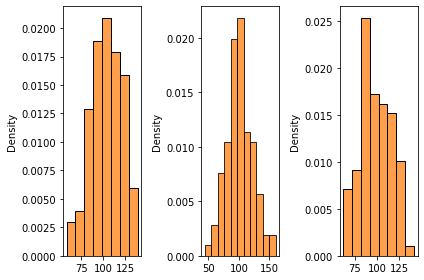

In [11]:
n_sample = 1000
N = 100

mu2 = 110
sigma = 20 

data2 = np.random.normal(mu2, scale=sigma, size=(n_sample, N))

n_to_view = 3

fig, axes = plt.subplots(ncols=n_to_view)
for i, x in enumerate(data1[:n_to_view]):
    sns.histplot(x, ax=axes[i], stat="density", color="C1")

plt.tight_layout()
plt.show()

3. Plot the distribution of the sample mean values from each data set using two histograms (one for A, one for B) in one figure. (2p)

    - **Correct understanding of sample mean (1p)**
    - **Plot (1p)**

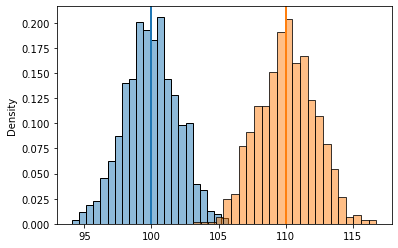

In [12]:
mean_data1 = np.mean(data1, axis = 1)
mean_data2 = np.mean(data2, axis=1)

fig, ax = plt.subplots()

sns.histplot(mean_data1, ax=ax, stat="density", color="C0", alpha=0.5)
sns.histplot(mean_data2, ax=ax, stat="density", color="C1", alpha=0.5)

ax.axvline(mu1, color="C0", lw=2)
ax.axvline(mu2, color="C1", lw=2)

plt.show()

4. Take the two artificial data sets you generated in (1) and (2). Compare one by one each pair of sample using a Student t-test (take the first sample of A and compare it with the first sample of B; take the second sample of A and compare it with the second sample of B;, etc.). What is the percentage of false negatives? (2p)

    - **Correct use of student t-test (1p)**
    - **Correct percentage (1p)**

In [13]:
threshold = 0.05

results = []

for d1, d2 in zip(data1, data2):
    t, p = stats.ttest_ind(d1, d2, equal_var=True)
    results.append(p > 0.05)
   
count = 0
for result in results:
    if result == True:
        count +=1
print (count/1000)
print(f"{np.mean(results) * 100}%")

0.056
5.6000000000000005%
